In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
def Evaluation(model):
  prob = model.predict_proba(test_X)
  fpr,tpr,threshold = roc_curve(test_Y,prob[:,1])
  AUC = auc(fpr,tpr)   
  plt.figure(figsize = [8,5])
  plt.plot(fpr,tpr,'r--',label = ['ROC(AUC = %0.2f)'%AUC])
  plt.title(f'ROC Curve\n AUC:{round(AUC,3)}')
  return AUC

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/Colab/datasets/standard_test.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/Colab/datasets/standard_sample_submission.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Colab/datasets/standard_train.csv')
X = df.drop(['ID_code','target'],axis=1)
Y = df['target']
df_back=df.copy()
# train test split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.25,random_state=90)
print(f' positive labels in train dataset take {round(100* train_Y.value_counts()[1]/train_Y.value_counts()[0],2)}%')
print(f' positive labels in test dataset take {round(100* test_Y.value_counts()[1]/test_Y.value_counts()[0],2)}%')

 positive labels in train dataset take 11.17%
 positive labels in test dataset take 11.18%


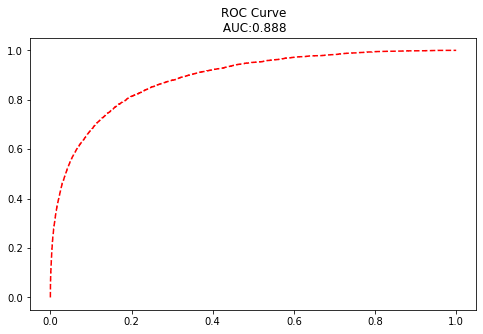

In [ ]:
nb = GaussianNB()
nb.fit(train_X,train_Y)
roc_auc = Evaluation(nb)